In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/coding-project-datazeit/coding_project_category_classification.csv')

In [4]:
df.head()

,parent_pid,domain_tld,category_dz,description_en
0,1000714377,douglas_de,Makeup > Face > Foundation,This fluid makeup provides long-lasting moistu...
1,1000753794,dm_de,Nails > Nail Care > Removers,The handy sample size ebelin nail polish remov...
2,1000790264,douglas_de,Nails > Nail Polish,"LE VERNIS by CHANEL: a novel, ultra-resistant ..."
3,1000805273,douglas_de,Makeup > Face > Foundation,Clinique's superbalanced makeup controls shine...
4,1000808310,douglas_de,Makeup > Lips > Lip Liner,Keeps lipstick in place The Quickliner for Lip...


In [5]:
df.shape

(8403, 4)

In [6]:
Null_percent=(df.isnull().sum()/df.shape[0])*100
print("The Percentage of Null Values in the dataset\n",Null_percent)

The Percentage of Null Values in the dataset
 parent_pid        0.000000
domain_tld        0.000000
category_dz       0.440319
description_en    0.000000
dtype: float64


In [7]:
df=df.drop_duplicates()
df=df.dropna()
df.shape

(8366, 4)

which category is the Most Occupied



Text(0.5, 1.0, 'Figure 3')

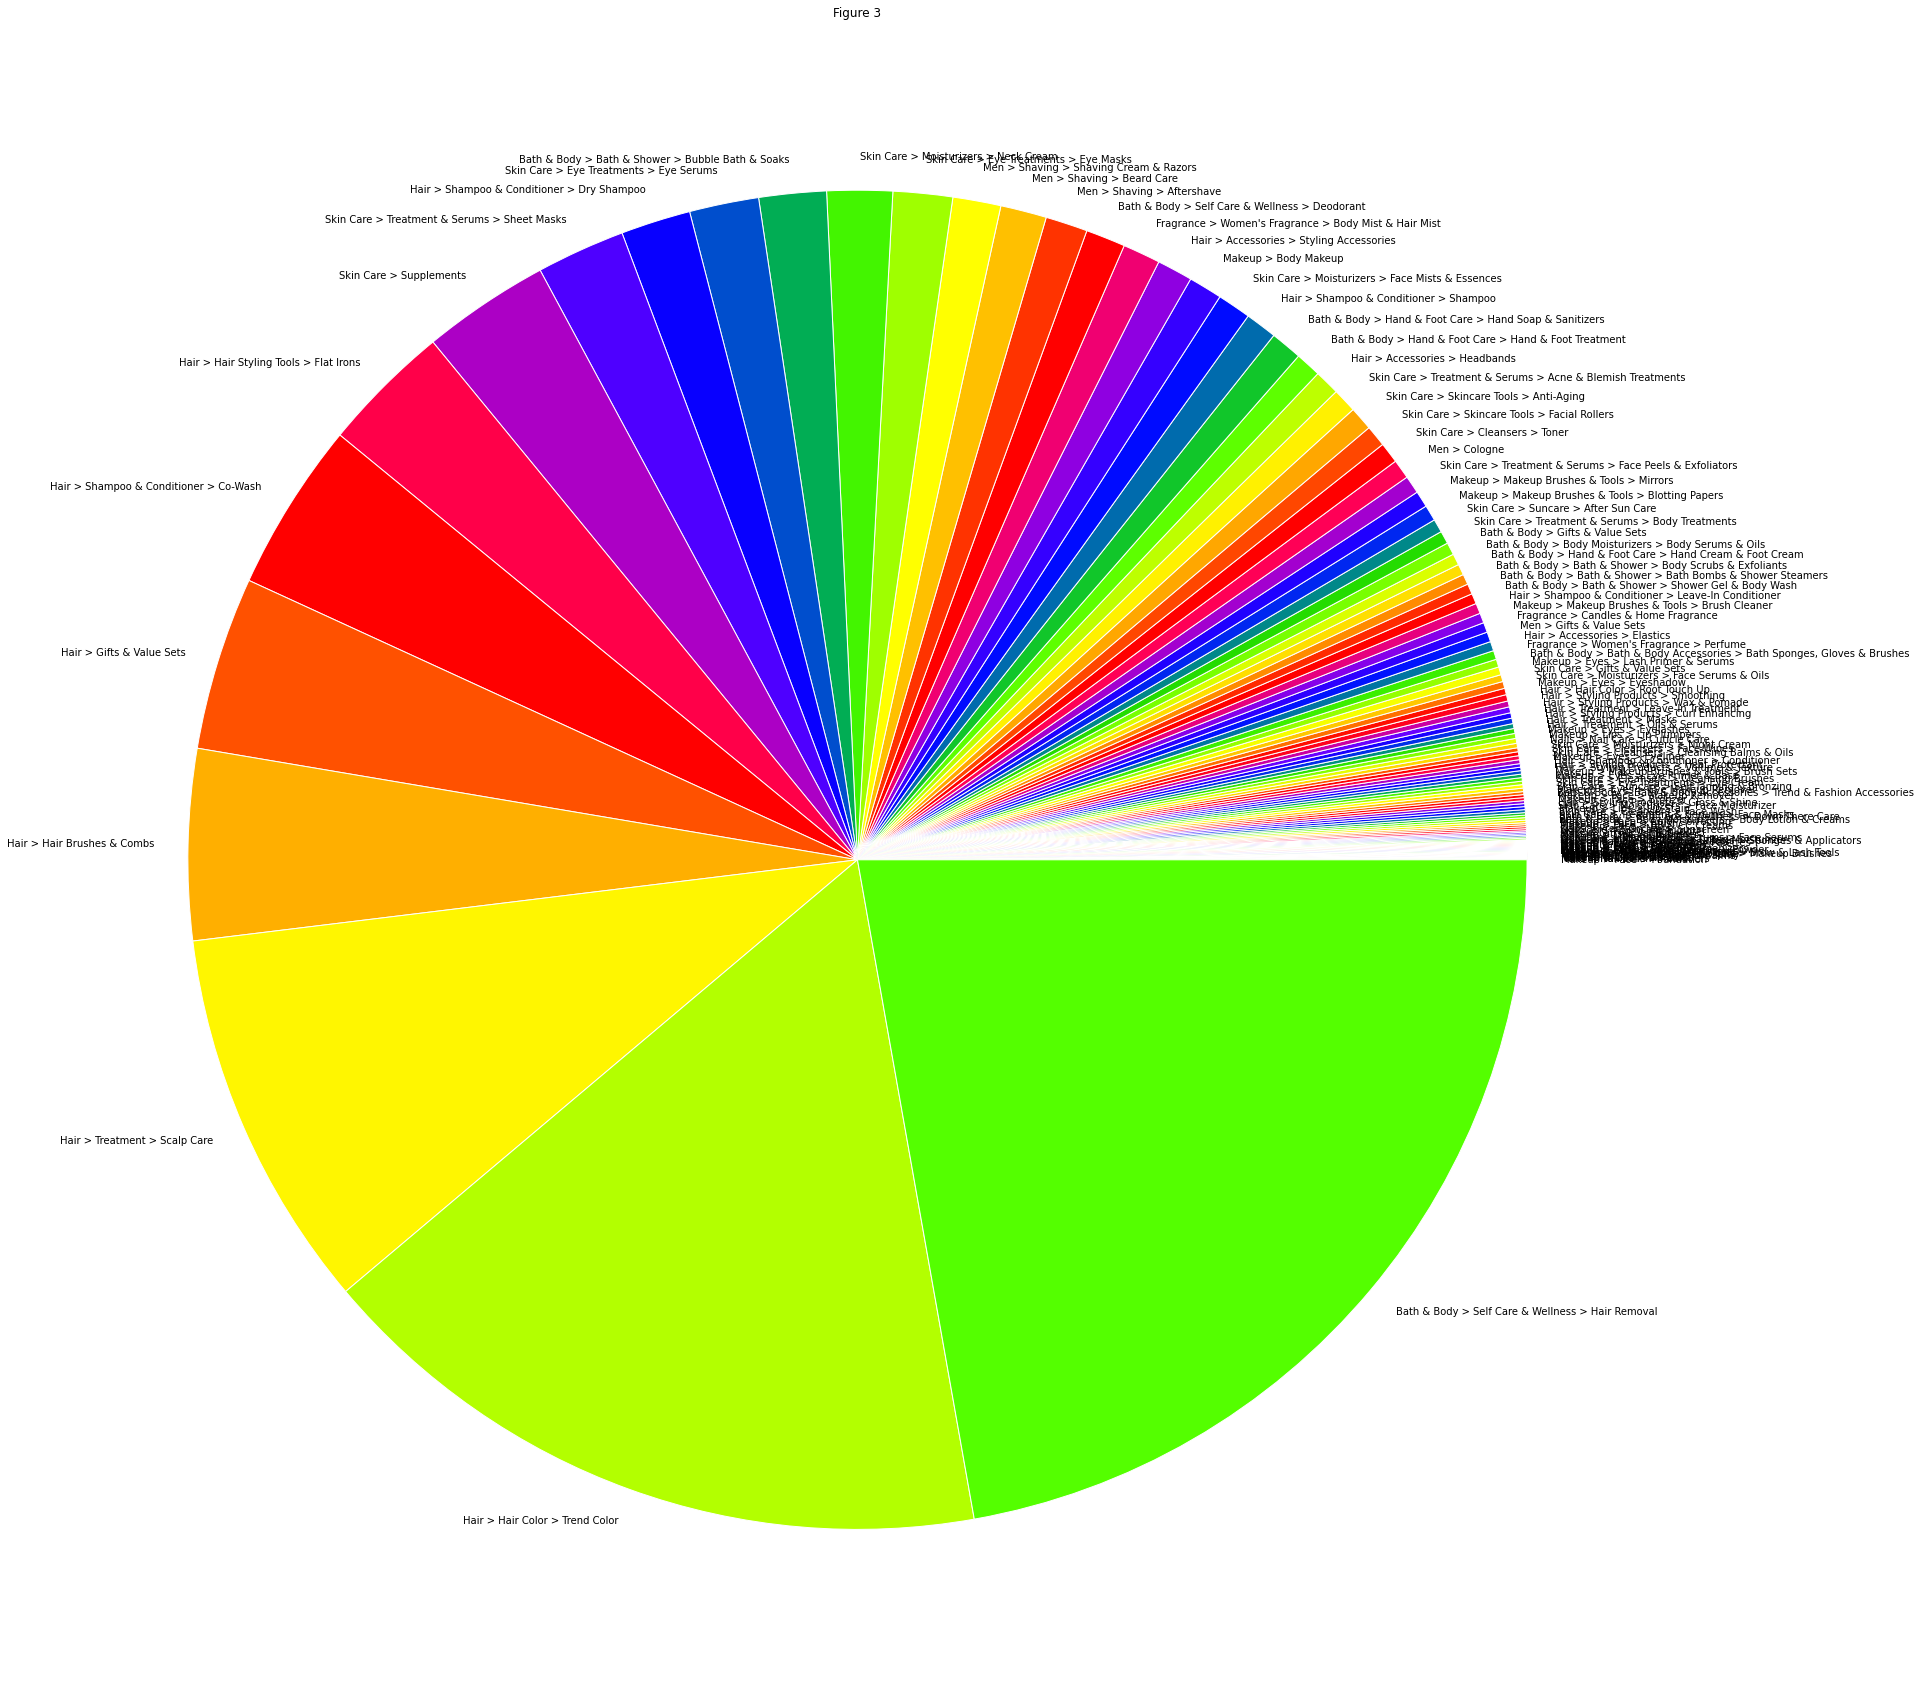

In [8]:
import random
print("which category is the Most Occupied\n")
category_count=sorted(df['category_dz'].value_counts())
labels=df['category_dz'].unique()
fig = plt.figure(figsize=[30, 50])
ax = fig.add_subplot(111)


cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(category_count)))

pie_wedge_collection = ax.pie(category_count, colors=colors, labels=labels, labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Figure 3")

In [9]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df['Target_category']=le.fit_transform(df['category_dz'])

In [11]:
df

,parent_pid,domain_tld,category_dz,description_en,Target_category
0,1000714377,douglas_de,Makeup > Face > Foundation,This fluid makeup provides long-lasting moistu...,60
1,1000753794,dm_de,Nails > Nail Care > Removers,The handy sample size ebelin nail polish remov...,92
2,1000790264,douglas_de,Nails > Nail Polish,"LE VERNIS by CHANEL: a novel, ultra-resistant ...",93
3,1000805273,douglas_de,Makeup > Face > Foundation,Clinique's superbalanced makeup controls shine...,60
4,1000808310,douglas_de,Makeup > Lips > Lip Liner,Keeps lipstick in place The Quickliner for Lip...,66
...,...,...,...,...,...
8398,p94721,sephora_de,Makeup > Face > Foundation,Helps create a more radiant complexion After 1...,60
8399,p96359,sephora_de,Makeup > Face > Foundation,This fluid makeup guarantees long-lasting mois...,60
8400,p966001,sephora_de,Nails > Nail Polish,Treat yourself to haute couture right to your ...,93
8401,p99700,sephora_de,Makeup > Face > Bronzer,"Get an even complexion, boost your tan or get ...",54


In [12]:
def cleaning(Inpdata):
    import re
    cleanedArticle1=re.sub(r'\\[?|$|(),"".@#=><|!]Â&*/-',r' ',Inpdata)
    cleanedArticle2=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle1)
    cleanedArticle3=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle2)
    cleanedArticle4=re.sub(r' +', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle4)
    cleanedArticle6=cleanedArticle5.replace("  ", "")
    cleanedArticle7=cleanedArticle6.lower()
    return(cleanedArticle7)

In [13]:
df['text_clean']=df['description_en'].apply(cleaning)

In [14]:
df.head()

,parent_pid,domain_tld,category_dz,description_en,Target_category,text_clean
0,1000714377,douglas_de,Makeup > Face > Foundation,This fluid makeup provides long-lasting moistu...,60,this fluid makeup provides long lasting moistu...
1,1000753794,dm_de,Nails > Nail Care > Removers,The handy sample size ebelin nail polish remov...,92,the handy sample size ebelin nail polish remov...
2,1000790264,douglas_de,Nails > Nail Polish,"LE VERNIS by CHANEL: a novel, ultra-resistant ...",93,vernis chanelnovelultra resistant manicurebri...
3,1000805273,douglas_de,Makeup > Face > Foundation,Clinique's superbalanced makeup controls shine...,60,cliniquesuperbalanced makeup controls shine oi...
4,1000808310,douglas_de,Makeup > Lips > Lip Liner,Keeps lipstick in place The Quickliner for Lip...,66,keeps lipstick place the quickliner for lips g...


In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import  DistilBertTokenizerFast,TFDistilBertForSequenceClassification
from keras.callbacks import ModelCheckpoint

In [16]:
DATA_COLUMN = 'text_clean'
LABEL_COLUMN = 'Target_category'
MAX_SEQUENCE_LENGTH = 512
LEARNING_RATE = 5e-5
BATCH_SIZE = 16
NUM_EPOCHS = 25

In [17]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [18]:
def tokenize(sentences, max_length=MAX_SEQUENCE_LENGTH, padding='max_length'):

    return tokenizer(sentences,truncation=True,padding=padding,max_length=max_length,return_tensors="tf")

In [19]:
train_data, validation_data, train_label, validation_label = train_test_split(df[DATA_COLUMN].tolist(),df[LABEL_COLUMN].tolist(),test_size=.2,shuffle=True)

In [20]:
full_data=df[DATA_COLUMN].tolist()
full_target=df[LABEL_COLUMN].tolist()

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(tokenize(train_data)),  # Convert BatchEncoding instance to dictionary
    train_label
)).shuffle(1000).batch(BATCH_SIZE).prefetch(1)

2021-12-20 16:28:13.495729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 16:28:13.496807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 16:28:13.497484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 16:28:13.499588: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
validation_dataset = tf.data.Dataset.from_tensor_slices((
    dict(tokenize(validation_data)),
    validation_label
)).batch(BATCH_SIZE).prefetch(1)

In [23]:
full_dataset= tf.data.Dataset.from_tensor_slices((
    dict(tokenize(full_data)),
    full_target
)).batch(BATCH_SIZE).prefetch(1)

In [24]:
NUM_LABELS=125
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=NUM_LABELS)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

2021-12-20 16:28:47.363252: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_layer_norm', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint 

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [26]:
checkpoint_path='./checkpoints/weights.best.hdf5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(train_dataset,y=None,validation_data=validation_dataset,batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,callbacks=callbacks_list)

Epoch 1/25


2021-12-20 16:28:58.920043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


419/419 [==============================] - 256s 584ms/step - loss: 2.0890 - val_loss: 1.2664
Epoch 2/25
419/419 [==============================] - 243s 581ms/step - loss: 1.0412 - val_loss: 0.9601
Epoch 3/25
419/419 [==============================] - 243s 581ms/step - loss: 0.7243 - val_loss: 0.9030
Epoch 4/25
419/419 [==============================] - 243s 581ms/step - loss: 0.5321 - val_loss: 0.8752
Epoch 5/25
419/419 [==============================] - 243s 581ms/step - loss: 0.3910 - val_loss: 0.8927
Epoch 6/25
419/419 [==============================] - 243s 581ms/step - loss: 0.3004 - val_loss: 0.9719
Epoch 7/25
419/419 [==============================] - 243s 581ms/step - loss: 0.2315 - val_loss: 1.0344
Epoch 8/25
419/419 [==============================] - 243s 581ms/step - loss: 0.1808 - val_loss: 0.9914
Epoch 9/25
419/419 [==============================] - 243s 581ms/step - loss: 0.1512 - val_loss: 0.9941
Epoch 10/25
419/419 [==============================] - 243s 581ms/step - lo

In [27]:
pred=model.predict_generator(validation_dataset)
val=np.argmax(pred.logits,axis=1)

In [28]:
valid=pd.DataFrame(validation_label,columns=['Target_category'])
valid['pred_category']=val
valid['Status']=np.where(valid['Target_category']==valid['pred_category'],1,0)
Acc=(valid['Status'].sum()/valid.shape[0])*100
print("The Accuracy on Test Data",Acc)

The Accuracy on Test Data 79.80884109916367


In [29]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, precision_score 
#from yellowbrick.datasets import load_occupancy
#from yellowbrick.model_selection import FeatureImportances
#from yellowbrick.classifier import ClassificationReport

In [30]:
full_pred=model.predict_generator(full_dataset)
pred_target=np.argmax(full_pred.logits,axis=1)
full_df=pd.DataFrame(df,columns=df.columns)
full_df['Target_category']=full_target
full_df['pred_category']=pred_target
full_df['status']=np.where(full_df['Target_category']==full_df['pred_category'],1,0)
Accuracy_on_data=(full_df['status'].sum()/full_df.shape[0])*100
print("The Accuracy on Full Dataset",Accuracy_on_data)

The Accuracy on Full Dataset 95.46975854649773


In [31]:
print("The Precision Score ",precision_score(full_df['Target_category'],full_df['pred_category'],average='weighted'))
print("The Recall Score", recall_score(full_df['Target_category'],full_df['pred_category'],average = 'weighted'))
print("The F1 Score ",   f1_score(full_df['Target_category'],full_df['pred_category'],average = 'weighted'))

The Precision Score  0.9561436515906704
The Recall Score 0.9546975854649773
The F1 Score  0.9542559884299971


In [32]:
output_df=pd.DataFrame(full_df,columns=['parent_pid','domain_tld','category_dz','description_en'])
output_df.insert(3,'category_model',value=full_df['pred_category'])
output_df['category_model']=le.inverse_transform(full_df['pred_category'])
output_df.to_csv('./output.csv',index=False)

In [33]:
classes = df['category_dz'].tolist()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']

The Classification Report


<AxesSubplot:>

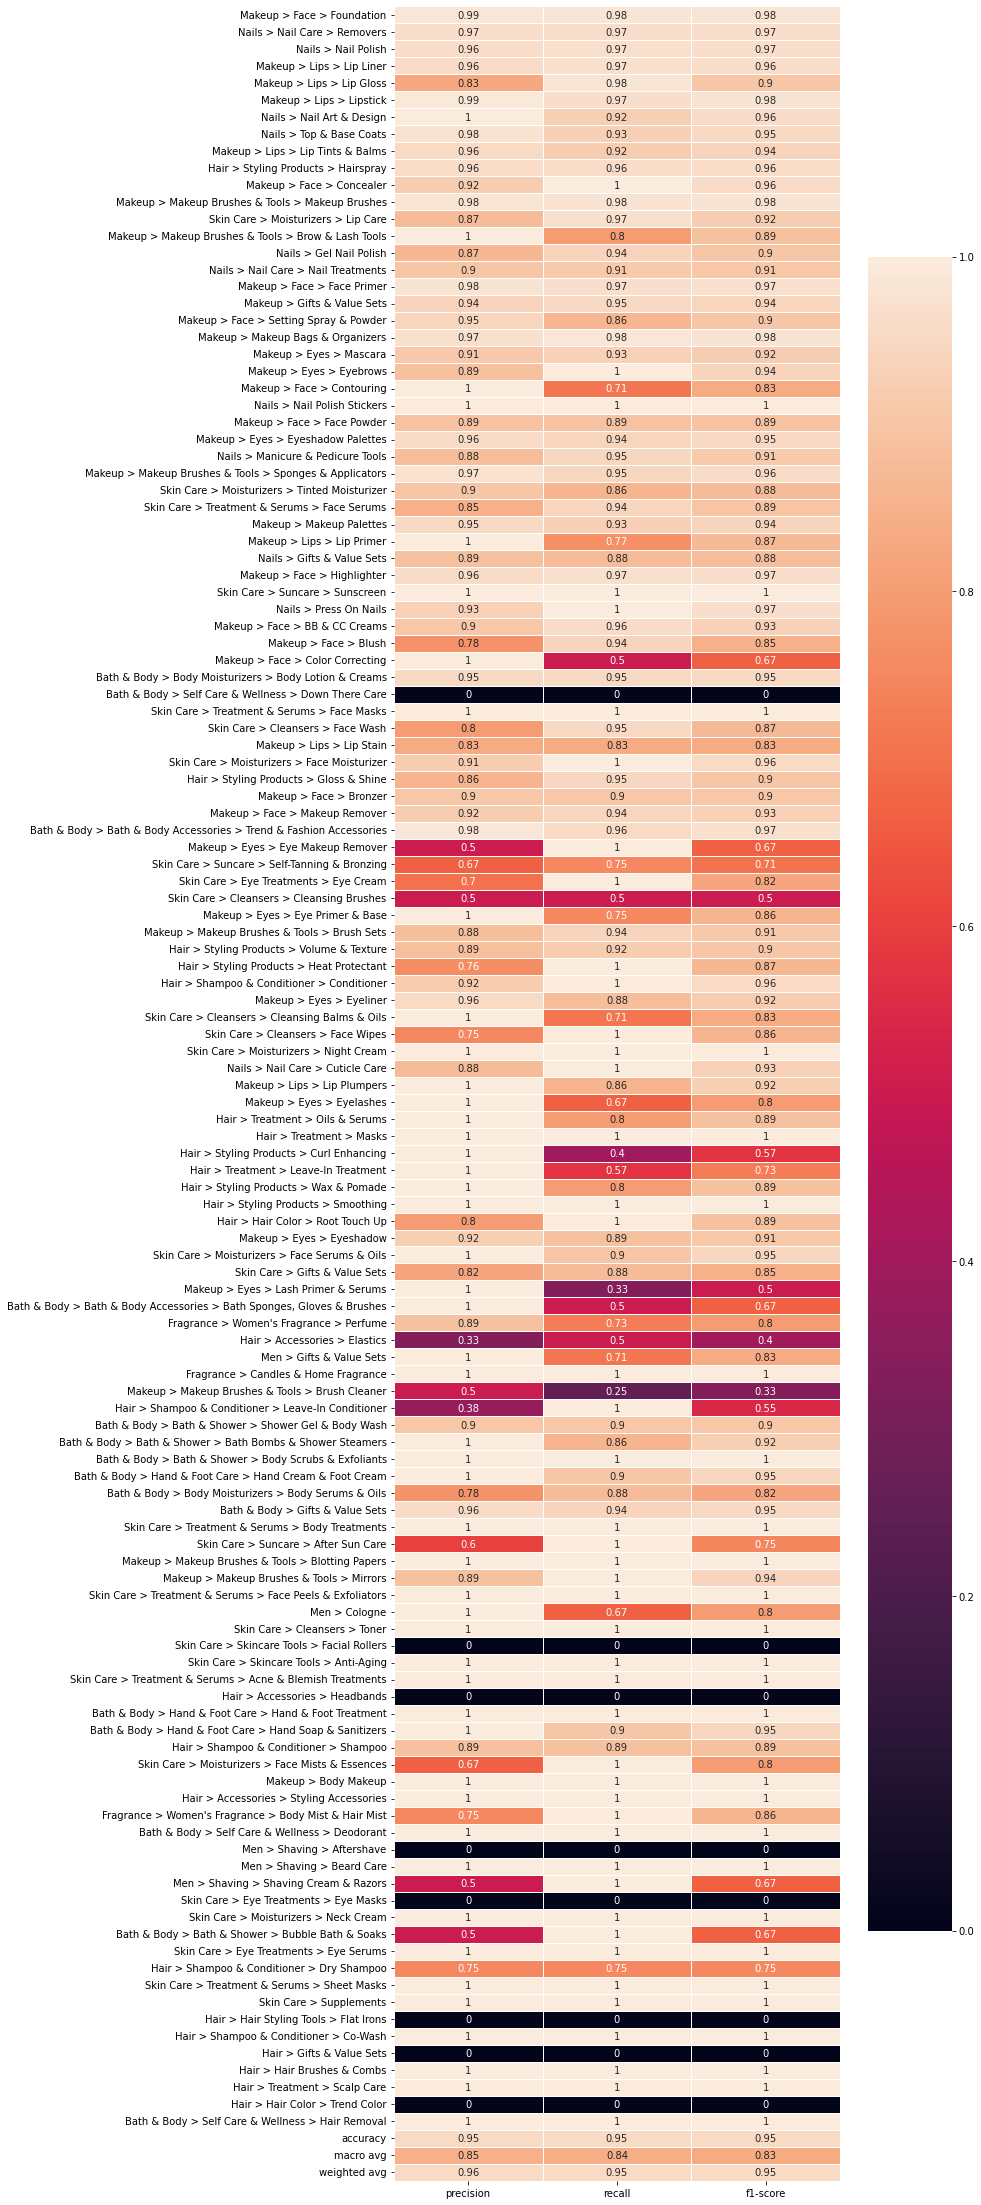

In [34]:
print("The Classification Report")
fig, ax = plt.subplots(figsize=(10,40))
class_report=classification_report(full_df['Target_category'],full_df['pred_category'],
                                  labels=full_df['Target_category'].unique(),target_names=output_df['category_dz'].unique(),output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,linewidths=.5, ax=ax)

The Confusion Matrix


<AxesSubplot:xlabel='None'>

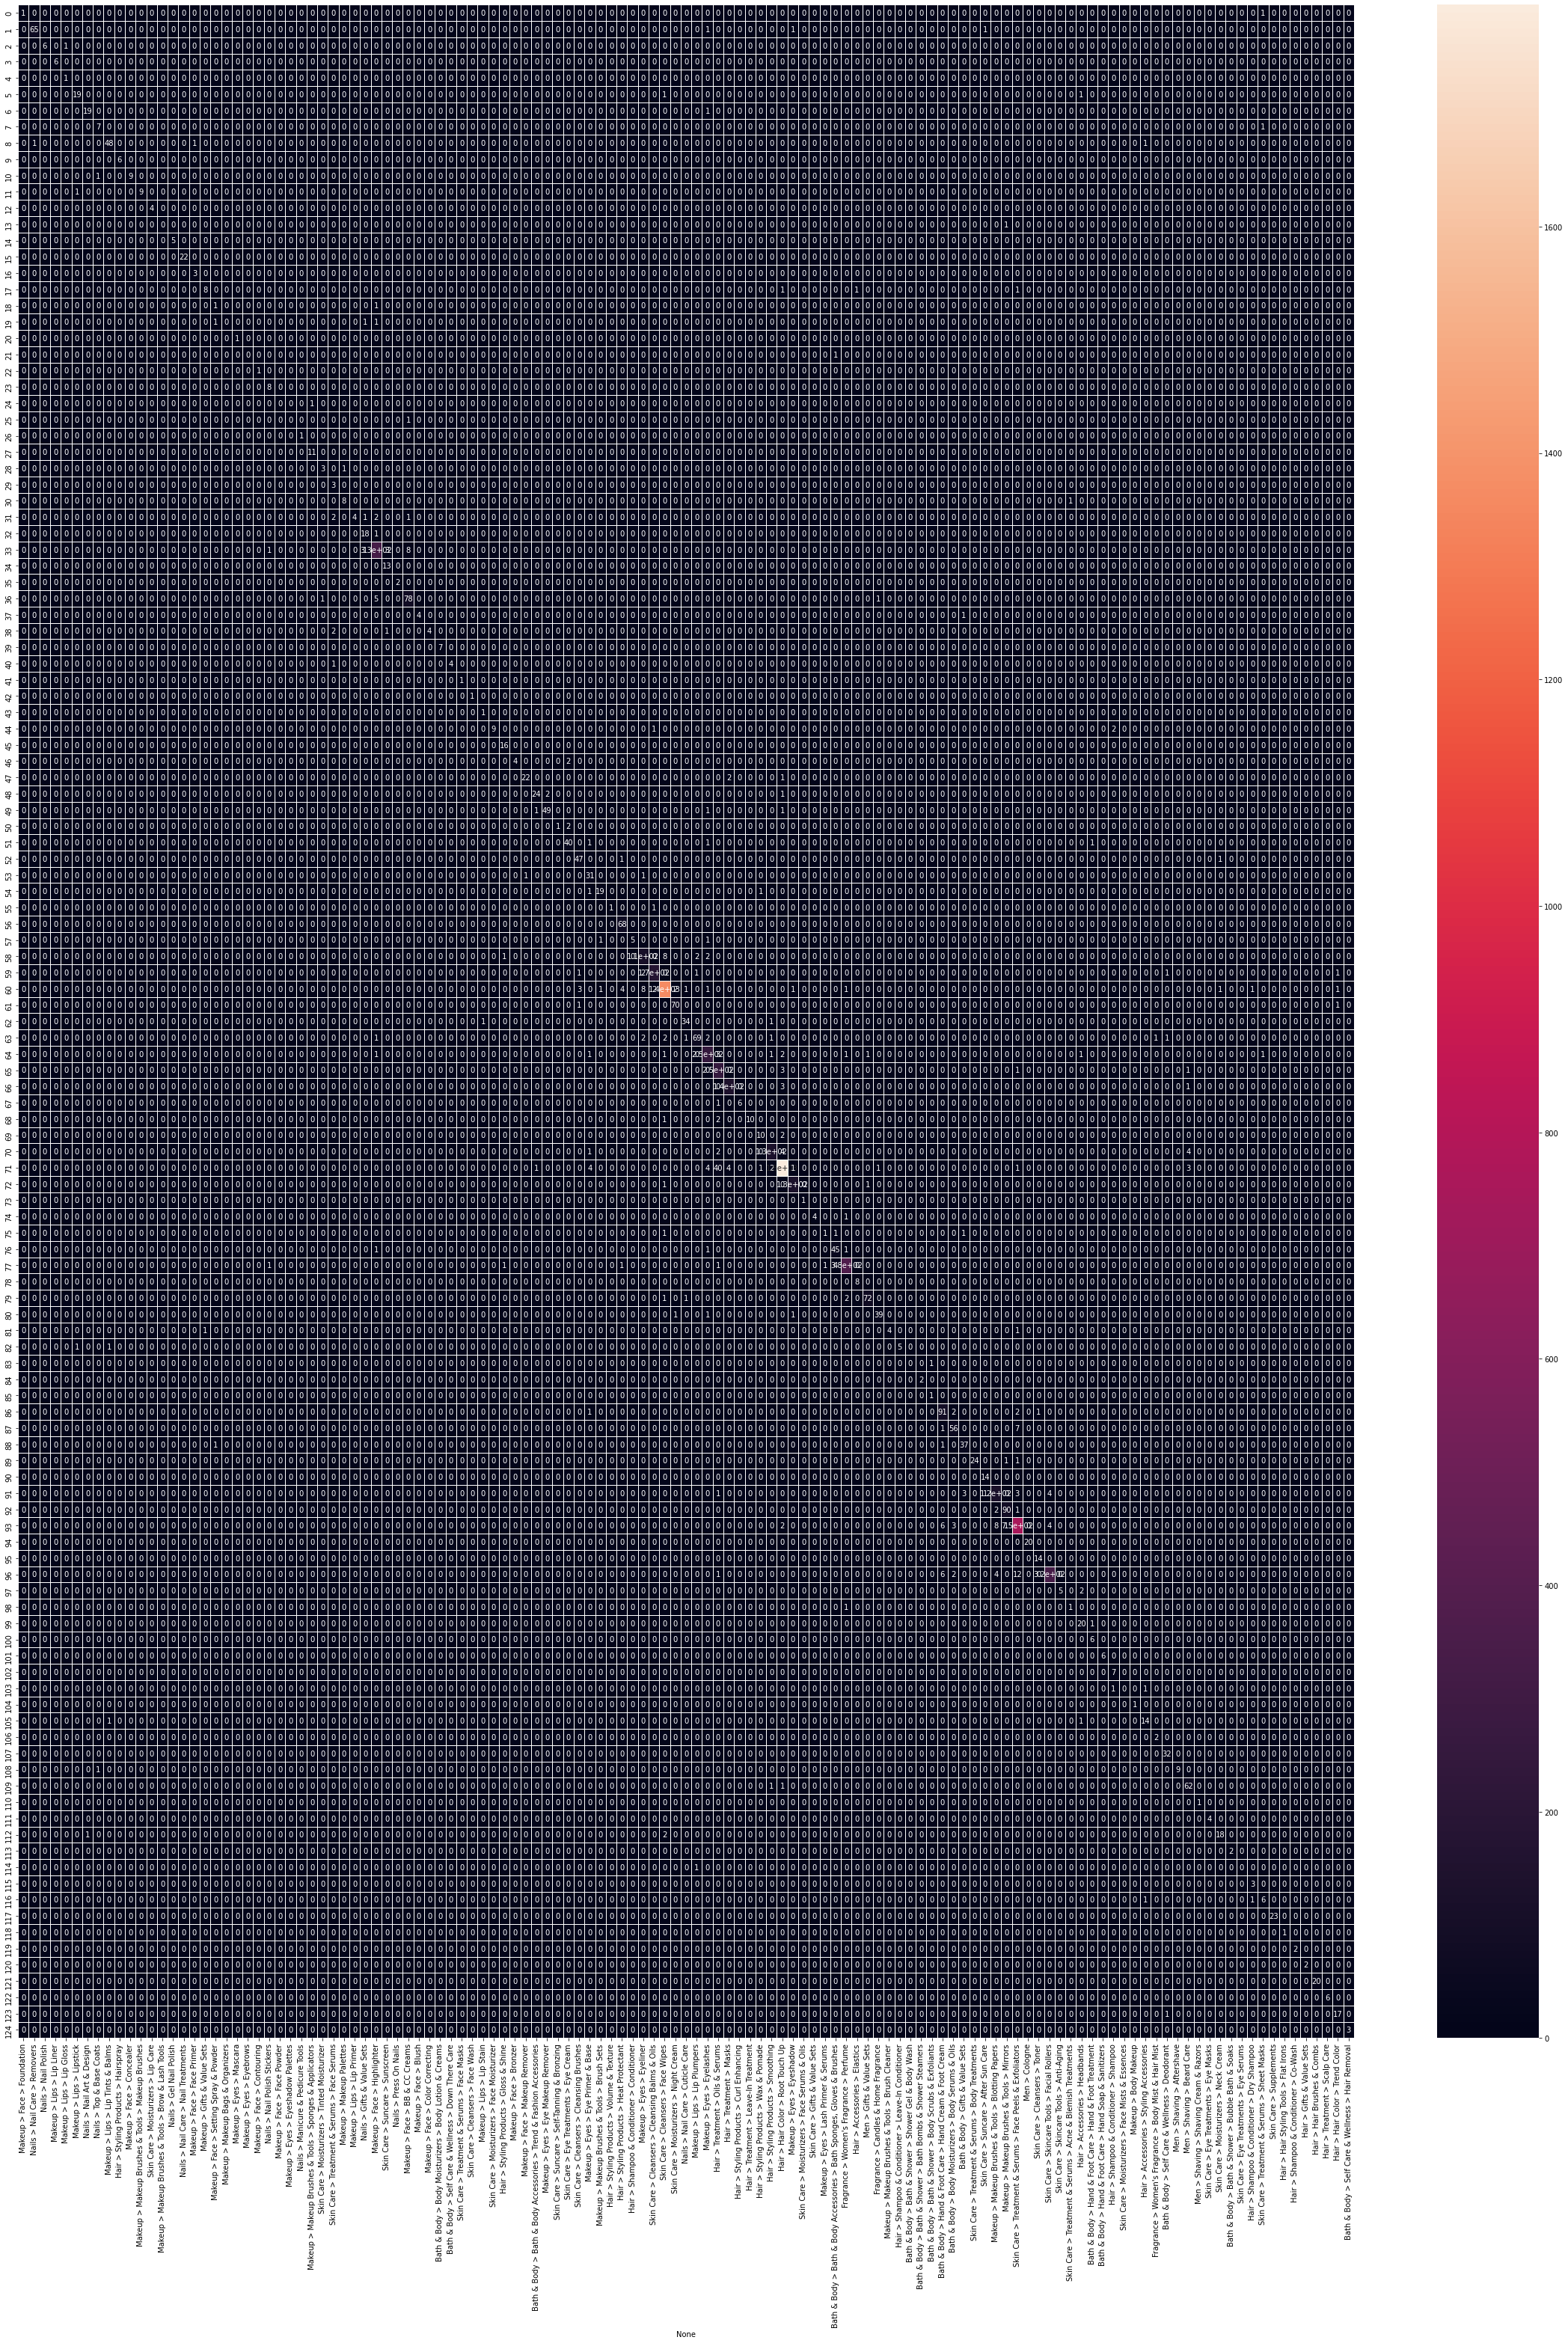

In [35]:
print("The Confusion Matrix")
fig, ax = plt.subplots(figsize=(40,50))
conf_matrix=confusion_matrix(full_df['Target_category'],full_df['pred_category'])
sns.heatmap(pd.DataFrame(conf_matrix,columns=[output_df['category_dz'].unique()]),annot=True,linewidths=.5, ax=ax)
